<a href="https://colab.research.google.com/github/elliotb456/Multi-Layered-Perceptron/blob/main/CS4287_Prj1_20276885_20260962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# David Walsh (20276885) & Elliot Buckley (20260962)
# Code executes to the end without error
# https://www.kaggle.com/code/kostasmar/exploring-the-iris-data-set-scikit-learn

# Install the ucimlrepo package using pip. This package is used for fetching datasets from the UCI Machine Learning Repository.
!pip install ucimlrepo

In [ ]:
# Importing necessary libraries for the machine learning process.
from ucimlrepo import fetch_ucirepo  # Function to fetch datasets from UCI repository.
from sklearn.model_selection import StratifiedKFold  # For stratified cross-validation.
from sklearn.preprocessing import StandardScaler  # For scaling the features.
from sklearn.neural_network import MLPClassifier  # The neural network model to be used.
from sklearn.metrics import classification_report, accuracy_score, log_loss  # For evaluating the model performance.
from numpy import mean  # For calculating the average.
import matplotlib.pyplot as plt  # For plotting the results.

In [ ]:
# Fetching the Iris dataset from the UCI repository using its ID.
iris = fetch_ucirepo(id = 53)

# Extracting the features and target variables from the dataset.
X = iris.data.features  # The feature columns.
y = iris.data.targets  # The target column.

# Printing dataset metadata and variable information
print(iris.metadata)
print(iris.variables)

# Setting up stratified k-fold cross-validation, this ensures that each fold is a good representative of the whole dataset in terms of class proportions
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)  # 10-fold cross-validation

# Lists to store preformance metrics for each fold
accuracies = []  # Store accuracies from each fold
class_reports = []  # Store classification reports from each fold
log_losses = []  # Store log losses from each fold

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'},

In [ ]:
# Start cross-validation: for each fold, train the model, make predictions, and calculate metrics
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # Compute the mean and std to be used for later scaling
    X_test_scaled = scaler.transform(X_test)  # Perform standardization by centering and scaling

    # Define Multi-Layer Perceptron classifier, with three layers of 10 neurons each
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, activation='relu', random_state=42)

    # Train the model using the training sets
    mlp.fit(X_train_scaled, y_train)

    # Make predictions using the testing set
    predictions = mlp.predict(X_test_scaled)

    # Get probabilities of each class
    probabilities = mlp.predict_proba(X_test_scaled)

    # Calculate log loss (cross-entropy loss) which quantifies the accuracy of a classifier by penalizing false classifications
    loss = log_loss(y_test, probabilities)
    log_losses.append(loss)  # Add to the list of log losses for each fold

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)  # Add to the list of accuracies for each fold

    # Generate a classification report including precision, recall, f1-score, etc.
    class_report = classification_report(y_test, predictions)
    class_reports.append(class_report)  # Add to the list of classification reports for each fold

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed w

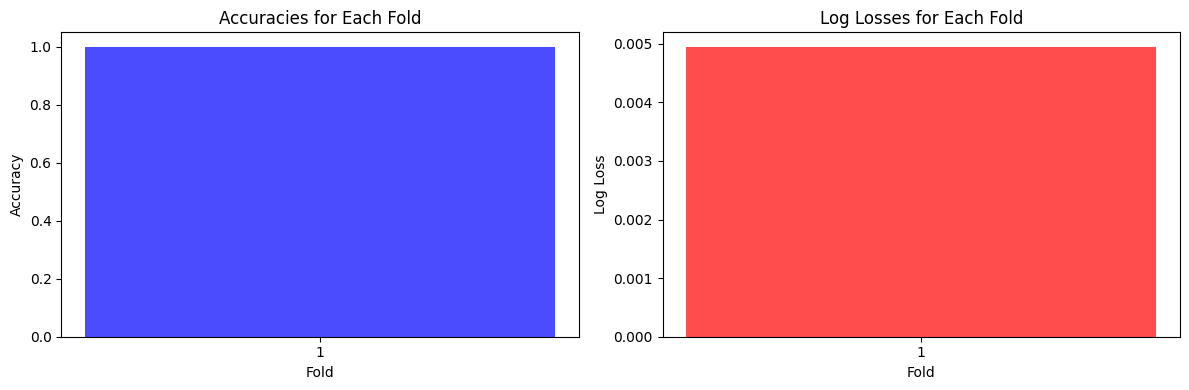

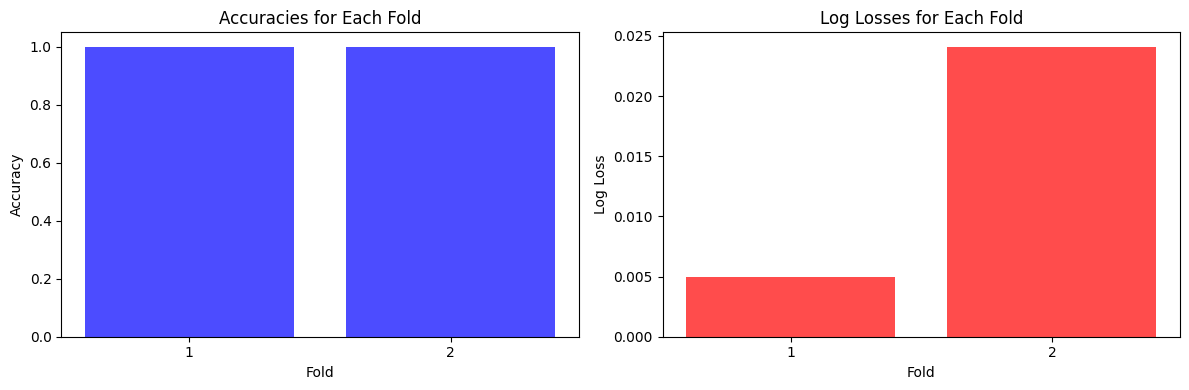

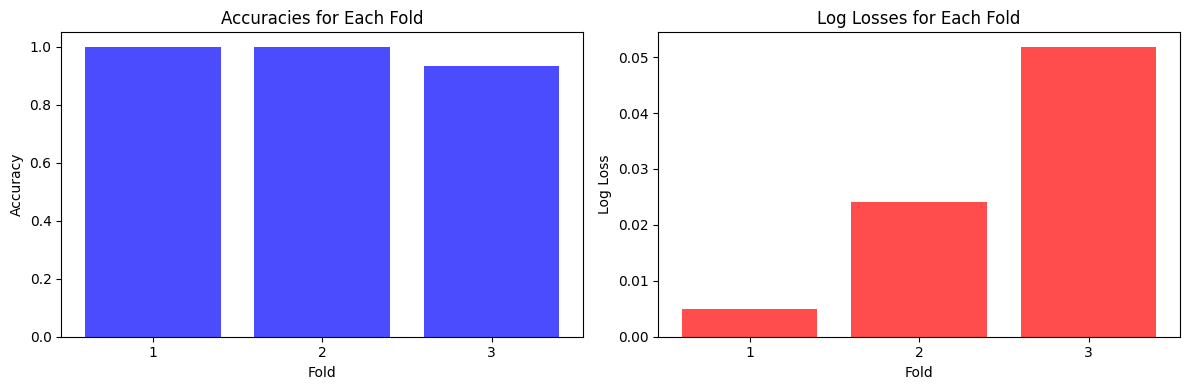

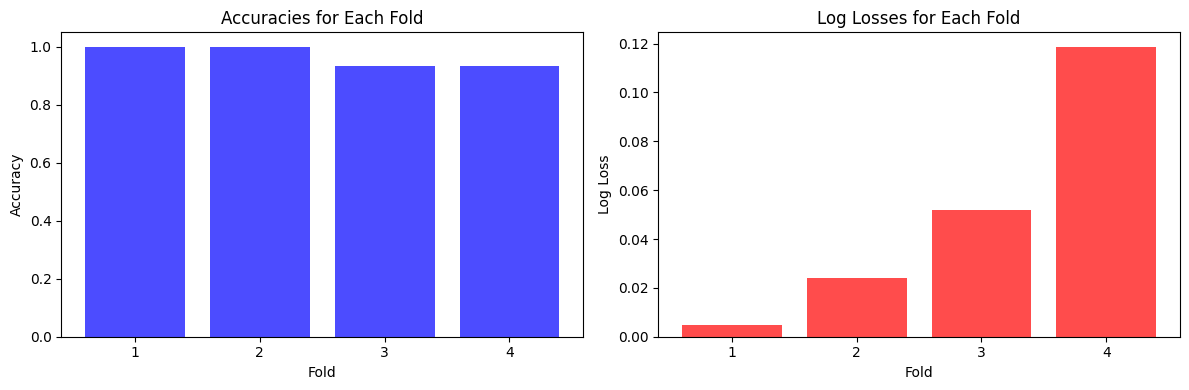

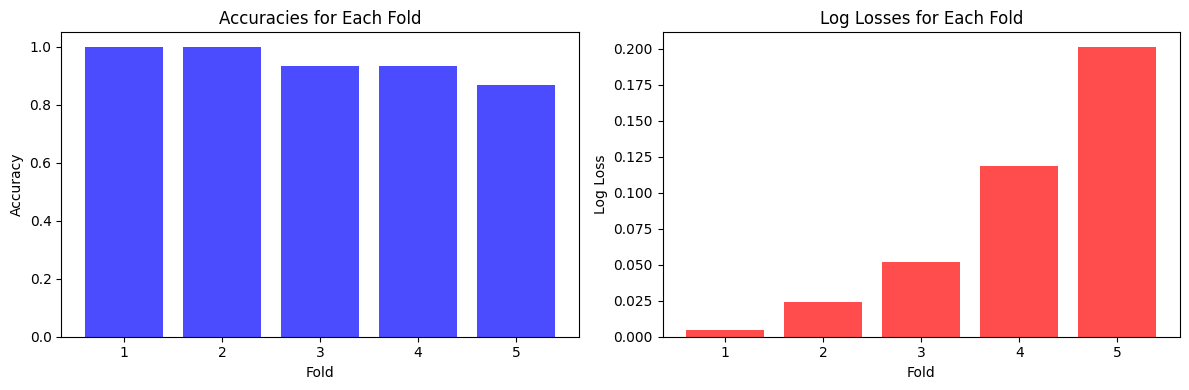

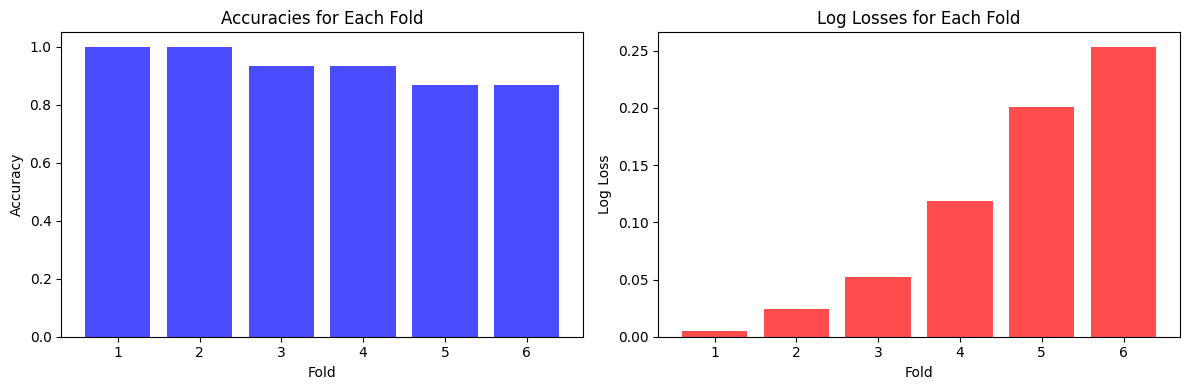

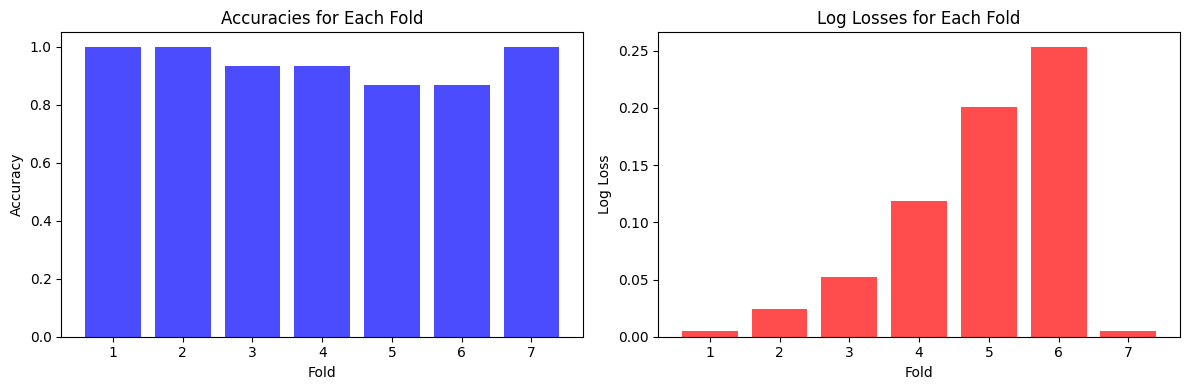

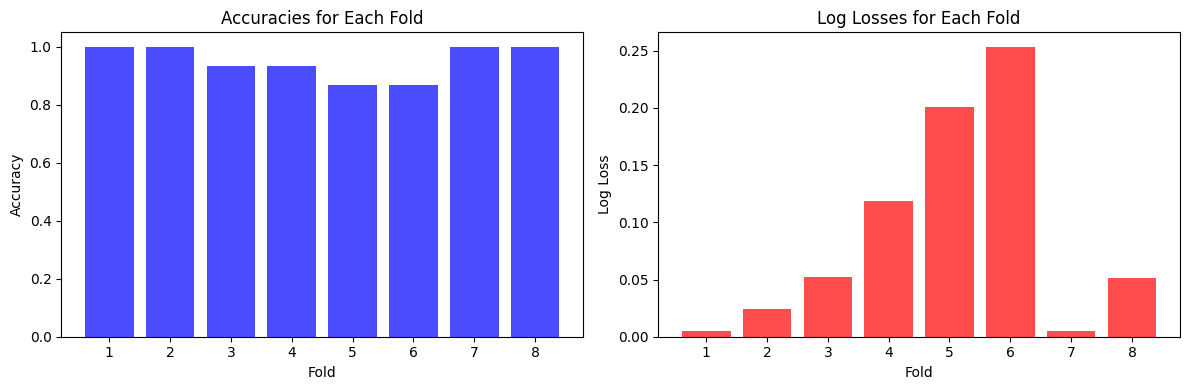

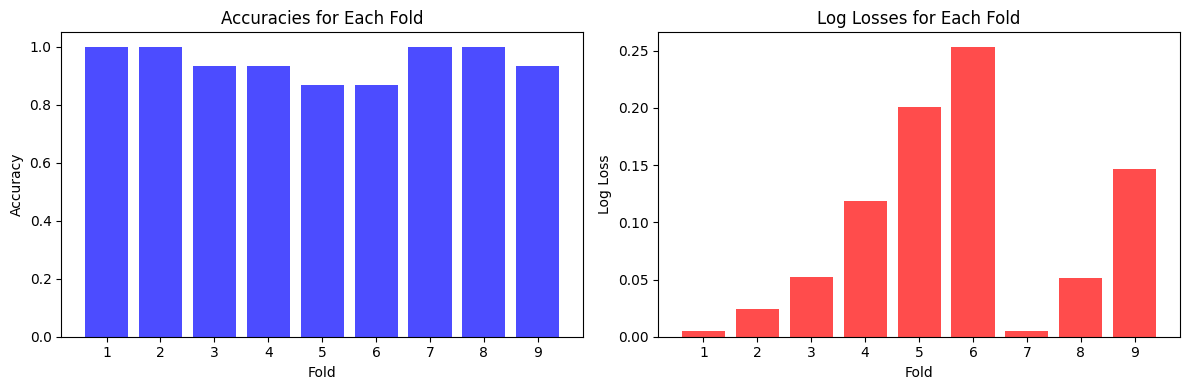

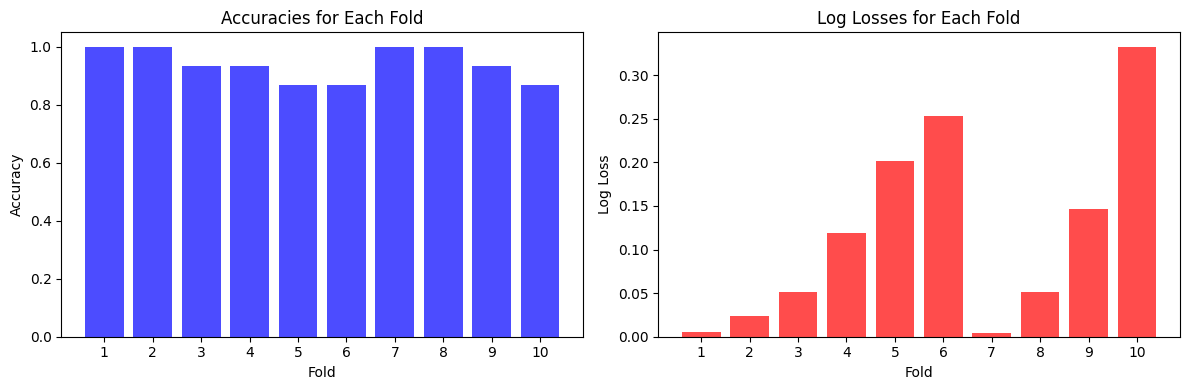

In [ ]:
# Plotting for each fold
for i in range(len(accuracies)):
    plt.figure(figsize=(12, 4))

    # Bar chart for accuracies
    plt.subplot(1, 2, 1)
    plt.bar(range(1, i + 2), accuracies[:i + 1], color='blue', alpha=0.7)
    plt.title('Accuracies for Each Fold')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, i + 2))

    # Bar chart for log losses
    plt.subplot(1, 2, 2)
    plt.bar(range(1, i + 2), log_losses[:i + 1], color='red', alpha=0.7)
    plt.title('Log Losses for Each Fold')
    plt.xlabel('Fold')
    plt.ylabel('Log Loss')
    plt.xticks(range(1, i + 2))

    plt.tight_layout()
    plt.show()


In [ ]:
# Calculate average accuracy and log loss across all folds
average_accuracy = mean(accuracies)
average_log_loss = mean(log_losses)

In [ ]:
# Print out the results
print(f"Average Accuracy: {average_accuracy}")
print(f"Average Log-Loss: {average_log_loss}")
for i, class_report in enumerate(class_reports):
    print(f"\nClassification Report for fold {i + 1}:")
    print(class_report)

"""
Output:

Average Accuracy: 0.9400000000000001
Average Log-Loss: 0.11895499973891159

Classification Report for fold 1:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         5
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15


Classification Report for fold 2:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         5
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15


Classification Report for fold 3:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.80      0.89         5
 Iris-virginica       0.83      1.00      0.91         5

       accuracy                           0.93        15
      macro avg       0.94      0.93      0.93        15
   weighted avg       0.94      0.93      0.93        15


Classification Report for fold 4:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.83      1.00      0.91         5
 Iris-virginica       1.00      0.80      0.89         5

       accuracy                           0.93        15
      macro avg       0.94      0.93      0.93        15
   weighted avg       0.94      0.93      0.93        15


Classification Report for fold 5:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.80      0.80      0.80         5
 Iris-virginica       0.80      0.80      0.80         5

       accuracy                           0.87        15
      macro avg       0.87      0.87      0.87        15
   weighted avg       0.87      0.87      0.87        15


Classification Report for fold 6:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.60      0.75         5
 Iris-virginica       0.71      1.00      0.83         5

       accuracy                           0.87        15
      macro avg       0.90      0.87      0.86        15
   weighted avg       0.90      0.87      0.86        15


Classification Report for fold 7:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         5
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15


Classification Report for fold 8:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         5
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15


Classification Report for fold 9:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.80      0.89         5
 Iris-virginica       0.83      1.00      0.91         5

       accuracy                           0.93        15
      macro avg       0.94      0.93      0.93        15
   weighted avg       0.94      0.93      0.93        15


Classification Report for fold 10:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.71      1.00      0.83         5
 Iris-virginica       1.00      0.60      0.75         5

       accuracy                           0.87        15
      macro avg       0.90      0.87      0.86        15
   weighted avg       0.90      0.87      0.86        15

\nOutput:\n\n\n
"""

Average Accuracy: 0.9400000000000001
Average Log-Loss: 0.11895499973891159

Classification Report for fold 1:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         5
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15


Classification Report for fold 2:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         5
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15


Classification Report for fold 3:
                

'\nOutput:\n\nAverage Accuracy: 0.9400000000000001\nAverage Log-Loss: 0.11895499973891159\n\nClassification Report for fold 1:\n                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00         5\nIris-versicolor       1.00      1.00      1.00         5\n Iris-virginica       1.00      1.00      1.00         5\n\n       accuracy                           1.00        15\n      macro avg       1.00      1.00      1.00        15\n   weighted avg       1.00      1.00      1.00        15\n\n\nClassification Report for fold 2:\n                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00         5\nIris-versicolor       1.00      1.00      1.00         5\n Iris-virginica       1.00      1.00      1.00         5\n\n       accuracy                           1.00        15\n      macro avg       1.00      1.00      1.00        15\n   weighted avg       1.00      1.00      1.00        15\n\n\nClassific